## Método da Colocação

Nesse notebook jupyter implementaremos o método da colocação para resolver problemas 
de valores de contorno em equações diferenciais. 
Usaremos sempre a melhor abordagem de implementação na linguagem Python. A "melhor" implementação não diz respeito necessariamente 
à um código otimizado, mas sim, ao fato de ser fácil de entender e implementar com a biblioteca mais adequada para o problema. 

Nesse caso, a biblioteca `SymPy` mostra-se uma excelente escolha para resolver problemas iniciais simples em equações difereciais, devido a simplicidade de implementação de cálculos que esse biblioteca proporciona. 

* **Módulos**

In [1]:
import numpy as np 
import scipy as sp 
from sympy import (symbols, diff,dsolve,Eq,init_printing,lambdify,
                   sin,cos, integrate, Function, Matrix, zeros)
import matplotlib.pyplot as plt 
from scipy.special import roots_chebyc


# deixando a saida simbolica em latex : 

init_printing(use_latex= True)

**Exemplo :** Solução analítica da equação diferencial 

$$\dfrac{d^2u}{dx^2} + u = x   \ \ \textrm{com } \ \ u(0) = 0, u(1) = 0$$

Solução Analítica : 



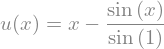

In [3]:
# criando os símbolos 
x = symbols("x", real = True)
u = Function("u")(x)

# criando a equação diferencial 
eq_edo = Eq(diff(u,x,2) + u, x)

# criando as condições de contorno como dicionarios 
pvc = {u.subs(x,0) : 0, 
       u.subs(x,1) : 0}

# resolvendo a equação diferencial :
sol_analitic = dsolve(eq_edo,u, ics=pvc)

print(f"Solução Analítica : \n")

sol_analitic

**Metodo da colocação**

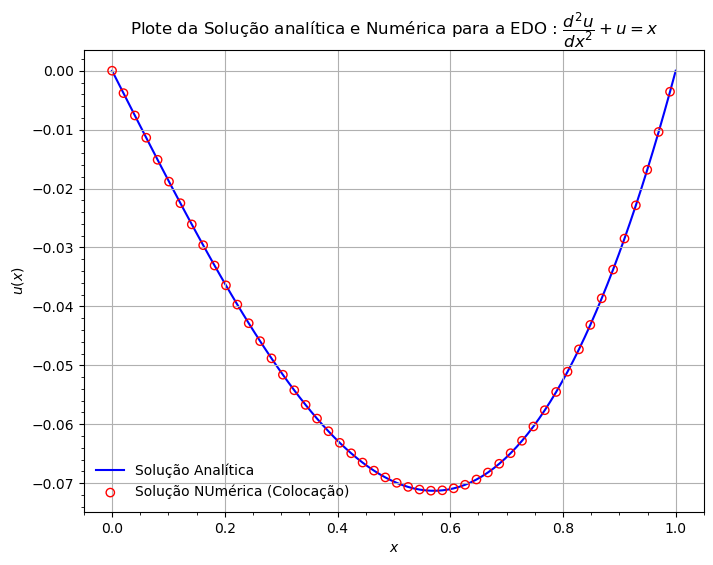

In [3]:
# criando os símbolos 
x = symbols("x", real = True)
u = Function("u")(x)

# criando a equação diferencial 
eq_edo = Eq(diff(u,x,2) + u, x)

# criando as condições de contorno como dicionarios 
pvc = {u.subs(x,0) : 0, 
       u.subs(x,1) : 0}

# resolvendo a equação diferencial :
sol_analitic = dsolve(eq_edo,u, ics=pvc)

# criando o vetor de pontos no eixo x :
a , b = 0 , 1 
vetx = np.linspace(a,b,100)

# avaliando a nossa solução analitica nesse vetor 
sol_analitic = lambdify(x,sol_analitic.rhs,"numpy")
u_analtic = sol_analitic(vetx)

## ================== computando o metodo da colocação ======== ## 

N = 4  # quantidade de pontos de colocação 
i = np.arange(1,N+1)
vet_xi = (a + b)/2 + ((b - a)/2)*np.cos(((2*i -1)/(2*N))*np.pi)

# criando as funções de base : phi_j 
lista_phi_j = Matrix([x**(i+1)*(1 - x) for i in  range(N)]) 

K = zeros(N,N)
F = zeros(N,1)

# montando a matriz global do sistema :

for i in range(N) : 
       
       for j in range(N) : 
              
              expr = diff(lista_phi_j[j],x,2).subs(x,vet_xi[i]) + lista_phi_j[j].subs(x,vet_xi[i])
              
              K[i,j] = expr
              
              
for i in range(N) : 
       
       F[i] = vet_xi[i]
       
# resolvendo o sistema linear usando a fatoração LU 
cj = K.LUsolve(F)

## ================= montando a solução geral ============== ## 

u_n = sum(cj[i]*lista_phi_j[i] for i in range(N))

u_n = lambdify(x,u_n,"numpy")

## ================= criando o plote ================== ## 
fig, ax = plt.subplots(figsize = (8,6))

ax.plot(vetx, sol_analitic(vetx),"-b", label = "Solução Analítica", zorder = 1)
ax.scatter(vetx[::2], u_n(vetx[::2]), facecolors = "none", edgecolors = "r",zorder = 2,
           label = "Solução NUmérica (Colocação)")
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$u(x)$")
ax.set_title(r"Plote da Solução analítica e Numérica para a EDO : $\dfrac{d^2u}{dx^2} + u = x$")
ax.grid(True)
ax.legend(frameon = False , loc = 0)
ax.minorticks_on() 

## ============ salvando os dados em arquivos ========== ## 
M_analitic = np.vstack((vetx,u_analtic)).T 
np.savetxt("dados_analitic_coloc.txt", M_analitic,fmt="%.5f", header="Solução analítica - Método da colocação")

M_numeric = np.vstack((vetx,u_n(vetx))).T 
np.savetxt("dados_numeric_coloc.txt", M_numeric,fmt="%.5f", header="Solução numérica - Método da colocação")


**Analise dos Erros**

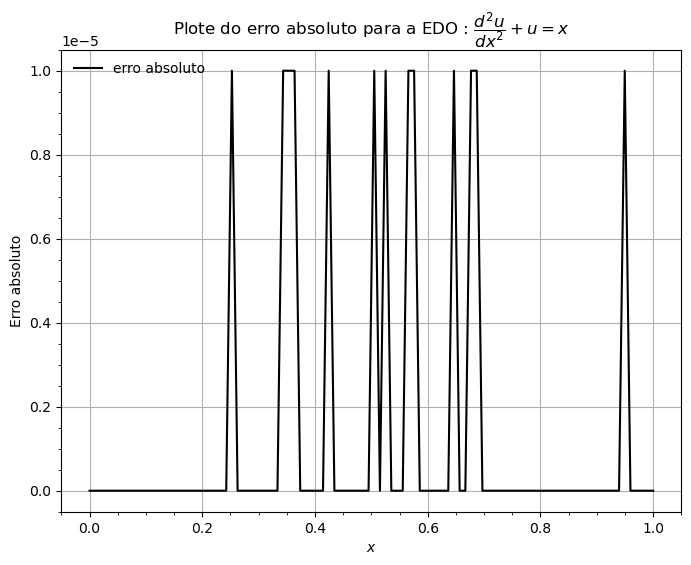

In [10]:
# criando uma função para o erro absoluto  :

def Erro_abs(ua,un): 
    """
    descrição : função que calcula o erro absoluto entre 
    a solução analitica e numerica
    """
    
    # teste de tamanho entre ambas a soluções 
    
    if (ua.size != un.size) : 
        
        raise ValueError("Soluções de Tamanhos Diferentes.")
    
    err_abs = np.abs(ua - un)
    
    return err_abs


## ================ executando o codigo =================== ## 

if __name__ == "__main__" : 
    
    # lendo os dados nuemricos 
    dados_analiticos = np.loadtxt("dados_analitic_coloc.txt", skiprows=1)
    vetx = dados_analiticos[:,0]
    ua = dados_analiticos[:,1]
    
    dados_numericos = np.loadtxt("dados_numeric_coloc.txt", skiprows=1)
    un = dados_numericos[:,1]
    
    ## ====== chamando as funções ======= ## 
    
    erro_absoluto = Erro_abs(ua,un)
    
    
    ## ======== criando o grafico do plote ================= ## 
    
    fig, ax = plt.subplots(figsize = (8,6))
    
    ax.plot(vetx, erro_absoluto, "k-", label = "erro absoluto")
    ax.set_xlabel(r"$x$")
    ax.set_ylabel(r"Erro absoluto")
    ax.set_title(r"Plote do erro absoluto para a EDO : $\dfrac{d^2u}{dx^2} + u = x$")
    ax.grid(True)
    ax.legend(frameon = False , loc = 0)
    ax.minorticks_on() 

 


 